In [0]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.over_sampling import SMOTE as SMO

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train =pd.read_csv('/content/gdrive/My Drive/ML/Training_x.csv',sep='\t', encoding='utf-8')
test = pd.read_csv('/content/gdrive/My Drive/ML/Testing_x.csv',sep='\t', encoding='utf-8')


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467214 entries, 0 to 1467213
Data columns (total 42 columns):
Unnamed: 0         1467214 non-null int64
Quarter            1467214 non-null float64
Month              1467214 non-null int64
DayofMonth         1467214 non-null int64
DayOfWeek          1467214 non-null float64
FlightNum          1467214 non-null float64
Origin             1467214 non-null object
DestAirportID      1467214 non-null float64
Dest               1467214 non-null object
CRSDepTime         1467214 non-null int64
DepTime            1467214 non-null float64
DepDelay           1467214 non-null float64
DepDelayMinutes    1467214 non-null float64
DepDel15           1467214 non-null float64
CRSArrTime         1467214 non-null float64
ArrTime            1467214 non-null float64
ArrDelayMinutes    1467214 non-null float64
ArrDel15           1467214 non-null float64
year               1467214 non-null int64
DewPointC          1467214 non-null float64
DewPointF          

In [0]:
data = pd.concat([train,test],axis = 0)
data = data.reset_index()
data = data.drop(columns = ['index'])

In [0]:
data['isDelay'] = 0

def func(row):
    if row['DepDel15']>0:
        return 1
    else:
        return 0

data['isDelay'] = data.apply(func, axis=1)


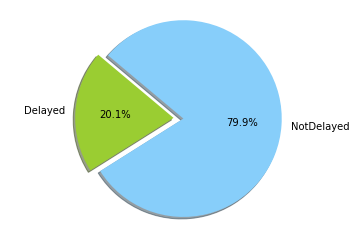

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Delayed', 'NotDelayed']
dl = (len(data[data['isDelay']==1])/len(data))*360
sizes = [dl,360-dl]
colors = [ 'yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
plt.savefig('/content/gdrive/My Drive/ML/DepDel15.png')

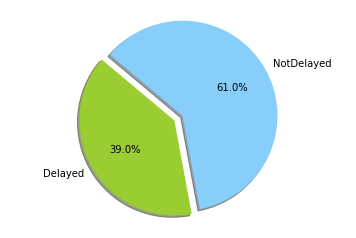

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Delayed', 'NotDelayed']
dl = (len(data[data['DepDelay']>=1])/len(data))*360
sizes = [dl,360-dl]
colors = [ 'yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
plt.savefig('/content/gdrive/My Drive/ML/DepDel.png')

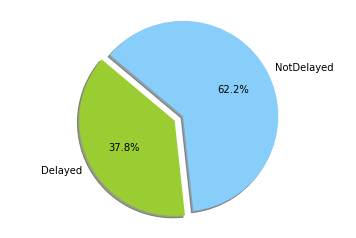

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Delayed', 'NotDelayed']
dl = (len(data[data['ArrDelayMinutes']>=1])/len(data))*360
sizes = [dl,360-dl]
colors = [ 'yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
plt.savefig('/content/gdrive/My Drive/ML/ArrDel.png')

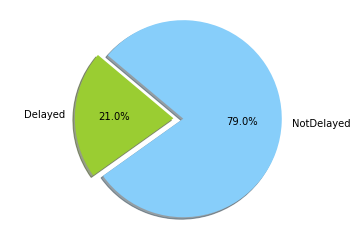

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = ['Delayed', 'NotDelayed']
dl = (len(data[data['ArrDel15']>=1])/len(data))*360
sizes = [dl,360-dl]
colors = [ 'yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
plt.savefig('/content/gdrive/My Drive/ML/ArrDel15.png')

In [0]:
x_tr = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek','CRSDepTime',
       'FlightNum', 'Origin', 'DestAirportID', 'Dest','year',
       'DewPointC', 'DewPointF', 'FeelsLikeC', 'FeelsLikeF', 'HeatIndexC',
       'HeatIndexF', 'WindChillC', 'WindChillF', 'WindGustKmph',
       'WindGustMiles', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'tempF', 'time', 'visibility', 'weatherCode', 'winddir16Point',
       'winddirDegree', 'windspeedKmph', 'windspeedMiles']
X= data[x_tr]
x_val = data[x_tr].iloc[:,:].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
enc  = LabelEncoder()
enc.fit(x_val[:,8].reshape(-1, 1) )
c1=['d1']
temp = pd.DataFrame(enc.transform(x_val[:,6]),columns = c1)
X = pd.concat([X,temp],axis=1)
X = X.drop(columns = ['Origin'])
c2=['a1']
temp = pd.DataFrame(enc.transform(x_val[:,8]),columns = c2)
X = pd.concat([X,temp],axis=1)
X = X.drop(columns = ['Dest'])
X = X.drop(columns = ['winddir16Point'])
X = X.drop(columns = ['DewPointF','FeelsLikeC','FeelsLikeF','HeatIndexF','WindChillF','WindGustMiles','tempF','windspeedMiles','Quarter'])
x_val = X.iloc[:,:].values
y = data['isDelay']
y_val  = y.iloc[:].values

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
sampler = SMO()

In [0]:
x_val,y_val =  sampler.fit_resample(x_val,y_val)


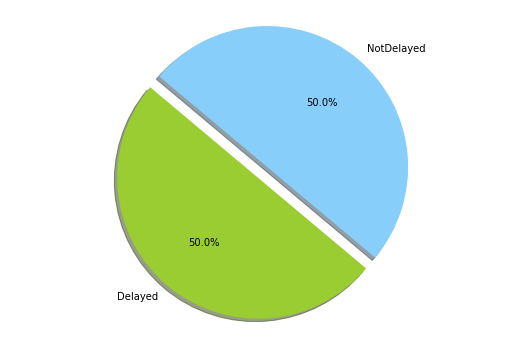

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

# Data to plot
fig, ax = plt.subplots(figsize=(9,6))
labels = ['Delayed', 'NotDelayed']
dl = (sum(y_val)/len(y_val))*360
sizes = [dl,360-dl]
colors = [ 'yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
pt = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
pt = pt[0][0].get_figure()
plt.savefig('/content/gdrive/My Drive/ML/DepDel15_afterSampling.png', dpi=72, bbox_inches='tight')


In [0]:
del X
del y
del train
del test


In [0]:
dep = data['DepDelayMinutes'].iloc[:].values

In [0]:
dep = dep[dep>0]

In [0]:
np.mean(dep)

35.94151645726976

In [0]:
print("median = ",np.median(dep))
print("max = ",max(dep))
print("min = ",min(dep))
                 

median =  15.0
max =  2149.0
min =  1.0


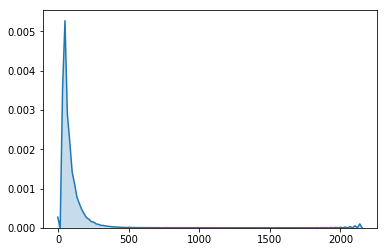

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
img =sns.kdeplot(dep, shade=True)
img = img.get_figure()
img.savefig("/content/gdrive/My Drive/ML/Normal_depDelay.png")

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


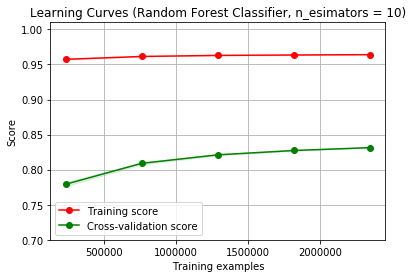

In [0]:

title = r"Learning Curves (Random Forest Classifier, n_esimators = 10)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=3)

plot_learning_curve(estimator, title,x_val , y_val, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [0]:

data =pd.read_csv('/content/gdrive/My Drive/ML/Dataset.csv',sep='\t', encoding='utf-8')

data = data.reset_index()
data = data.drop(columns = ['index'])
data = data[data['ArrDel15']==1]
data = data.reset_index()
data = data.drop(columns = ['index'])
data = data.drop(columns = ['Unnamed: 0'])
x_tr = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek','CRSDepTime',
        'Origin',  'Dest','year','DepDelay',
       'DewPointC', 'DewPointF', 'FeelsLikeC', 'FeelsLikeF', 'HeatIndexC',
       'HeatIndexF', 'WindChillC', 'WindChillF', 'WindGustKmph',
       'WindGustMiles', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'tempF', 'time', 'visibility', 'weatherCode', 'winddir16Point',
       'winddirDegree', 'windspeedKmph', 'windspeedMiles']
X= data[x_tr]


In [0]:
def func(row):
    if(row['year']==2016):
      row['year'] = 1  # lable encoding the year values
    else:
      row['year'] = 2  
    return row
X= X.apply(func, axis=1)
x_val = X.iloc[:,:].values
x_val[0]

array([1.0, 1, 1, 5.0, 1725.0, 'ATL', 'DFW', 1, 63.0, 8.0, 47.0, 8.0,
       46.0, 10.0, 49.0, 8.0, 46.0, 17.0, 11.0, 100.0, 91.0, 0.1, 1023.0,
       10.0, 49.0, 0.0, 10.0, 176.0, 'NW', 318.0, 11.0, 7.0], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
enc  = LabelEncoder()
enc.fit(x_val[:,6].reshape(-1, 1) )
c1=['d1']
temp = pd.DataFrame(enc.transform(x_val[:,5]),columns = c1)
X = pd.concat([X,temp],axis=1)
X = X.drop(columns = ['Origin'])
c2=['a1']
temp = pd.DataFrame(enc.transform(x_val[:,6]),columns = c2)
X = pd.concat([X,temp],axis=1)
X = X.drop(columns = ['Dest'])
X = X.drop(columns = ['winddir16Point'])
X = X.drop(columns = ['DewPointF','FeelsLikeC','FeelsLikeF','HeatIndexF','WindChillF','WindGustMiles','tempF','windspeedMiles','Quarter','time'])
x_val = X.iloc[:,:].values
Y = pd.DataFrame(data['ArrDelayMinutes'])
y_val = Y.iloc[:,:].values

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
x_val[0]

array([1.000e+00, 1.000e+00, 5.000e+00, 1.725e+03, 1.000e+00, 6.300e+01,
       8.000e+00, 1.000e+01, 8.000e+00, 1.700e+01, 1.000e+02, 9.100e+01,
       1.000e-01, 1.023e+03, 1.000e+01, 1.000e+01, 1.760e+02, 3.180e+02,
       1.100e+01, 0.000e+00, 3.000e+00])

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


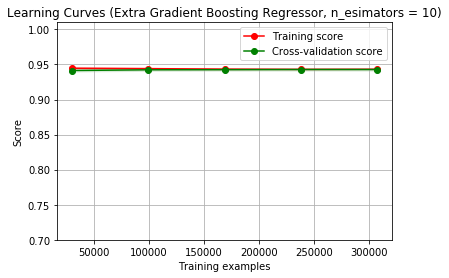

In [0]:

title = r"Learning Curves (Extra Gradient Boosting Regressor, n_esimators = 10)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
from sklearn.ensemble import GradientBoostingRegressor as GBR
estimator = GBR()

plot_learning_curve(estimator, title,x_val , y_val, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [0]:
y_val

array([[ 36.],
       [ 26.],
       [ 36.],
       ...,
       [ 34.],
       [ 25.],
       [164.]])

In [0]:
max(y_val)

array([2142.])

In [0]:
np.mean(y_val)

62.43262653809518

In [0]:
np.median(y_val)

39.0

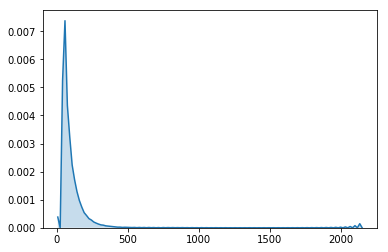

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
img =sns.kdeplot(y_val.reshape(1,-1)[0] , shade=True)
img = img.get_figure()
img.savefig("/content/gdrive/My Drive/ML/Normal_ArrDelay.png")

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df = data['ArrDelayMinutes']

fig = {
    "data": [{
        "type": 'violin',
        "y": data['ArrDelayMinutes'],
        "box": {
            "visible": True
        },
        "line": {
            "color": 'black'
        },
        "meanline": {
            "visible": True
        },
        "fillcolor": '#8dd3c7',
        "opacity": 0.6,
        "x0": 'Total Bill'
    }],
    "layout" : {
        "title": "",
        "yaxis": {
            "zeroline": False,
        }
    }
}

py.iplot(fig, filename = 'violin/basic', validate = False)

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: ignored

In [0]:
df.to_csv('/content/gdrive/My Drive/ML/plotly.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [0]:
df

0          36.0
1          26.0
2          36.0
3          32.0
4          46.0
5          17.0
6          47.0
7          16.0
8         108.0
9          21.0
10         16.0
11         61.0
12         15.0
13         95.0
14         26.0
15         36.0
16        124.0
17         23.0
18         18.0
19         31.0
20         31.0
21         20.0
22         40.0
23         45.0
24         16.0
25         16.0
26         19.0
27         15.0
28        502.0
29         18.0
          ...  
383155     20.0
383156     84.0
383157     42.0
383158     20.0
383159     23.0
383160     49.0
383161     20.0
383162     21.0
383163     26.0
383164     21.0
383165     98.0
383166     67.0
383167     47.0
383168     38.0
383169     16.0
383170     25.0
383171     30.0
383172     85.0
383173    162.0
383174     26.0
383175     19.0
383176     29.0
383177    173.0
383178    273.0
383179     26.0
383180     17.0
383181     46.0
383182     34.0
383183     25.0
383184    164.0
Name: ArrDelayMinutes, L

In [0]:
max(data['ArrDelayMinutes'])

2142.0